<a href="https://colab.research.google.com/github/debora28/pi-2020.2/blob/main/crime_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link do Drive para o Dataset: https://drive.google.com/file/d/1WHhbfgQUHHtf43QgXQ-PH_LHhPOF9BFJ/view?usp=sharing

Importando bibliotecas do numpy, pandas, matplotlib e seaborn 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Importando csv do GitHub:

In [2]:
url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/crimeExample.csv'
mydata = pd.read_csv(url)

Lendo o arquivo (apenas se for carregado diretamente no notebook Colab):


In [3]:
# mydata = pd.read_csv('crimeExample.csv')
# mydata.head()

Descrevendo os dados e obtendo gráficos: 

In [4]:
mydata.describe()


,Dc_Dist,Hour,Dc_Key,UCR_General,Police_Districts,Lon,Lat
count,100.000000,100.000000,1.000000e+02,100.000000,56.000000,56.000000,56.000000
mean,23.990000,12.130000,2.012160e+11,852.000000,12.625000,-75.162646,39.977759
std,20.060764,6.248483,2.987761e+08,561.469932,5.245128,0.054152,0.037345
min,1.000000,0.000000,2.006770e+11,200.000000,1.000000,-75.266605,39.883852
25%,15.000000,9.000000,2.009230e+11,600.000000,11.000000,-75.198512,39.956288
50%,19.000000,12.000000,2.009990e+11,700.000000,14.000000,-75.167994,39.975337
75%,24.000000,17.000000,2.015180e+11,800.000000,16.000000,-75.129325,40.006901
max,92.000000,23.000000,2.015770e+11,2600.000000,22.000000,-75.032986,40.055312


In [5]:
mydata.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600,All Other Offenses,8.0,2009-06,-75.166350,39.969532


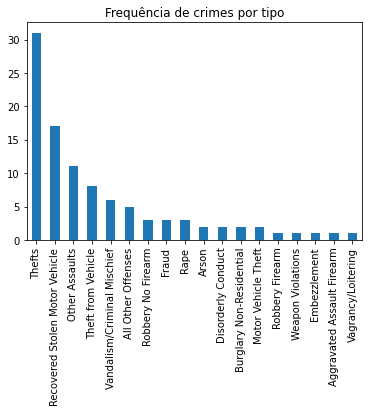

In [6]:
##Ver qual crime é mais frequente
mydata['Text_General_Code'].value_counts().plot(kind='bar', title='Frequência de crimes por tipo')




**Limpeza e Tratamento**



1. Removendo nulos:
NA - Not Available e NaN - Not a Number

In [7]:
print(mydata.isnull().any())
print()
print(mydata.info())
##Police_Districts, Lon e Lat são os que tem mais valores nulos (Apenas 56 de 100 estão preenchidos)

Dc_Dist               False
Psa                   False
Dispatch_Date_Time    False
Dispatch_Date         False
Dispatch_Time         False
Hour                  False
Dc_Key                False
Location_Block        False
UCR_General           False
Text_General_Code     False
Police_Districts       True
Month                 False
Lon                    True
Lat                    True
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Dc_Dist             100 non-null    int64  
 1   Psa                 100 non-null    object 
 2   Dispatch_Date_Time  100 non-null    object 
 3   Dispatch_Date       100 non-null    object 
 4   Dispatch_Time       100 non-null    object 
 5   Hour                100 non-null    int64  
 6   Dc_Key              100 non-null    int64  
 7   Location_Block      100 non-null    object 
 

In [8]:
## Cria um novo dataframe (mydata2) sem a coluna Police_Districts
mydata2 = mydata.drop('Police_Districts', axis=1)
mydata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Dc_Dist             100 non-null    int64  
 1   Psa                 100 non-null    object 
 2   Dispatch_Date_Time  100 non-null    object 
 3   Dispatch_Date       100 non-null    object 
 4   Dispatch_Time       100 non-null    object 
 5   Hour                100 non-null    int64  
 6   Dc_Key              100 non-null    int64  
 7   Location_Block      100 non-null    object 
 8   UCR_General         100 non-null    int64  
 9   Text_General_Code   100 non-null    object 
 10  Month               100 non-null    object 
 11  Lon                 56 non-null     float64
 12  Lat                 56 non-null     float64
dtypes: float64(2), int64(4), object(7)
memory usage: 10.3+ KB


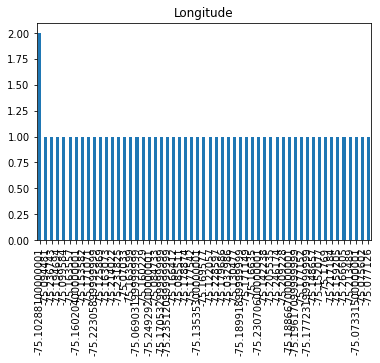

In [9]:
##Observando os dados:
##Uma das coordenadas é mais comum, então pode ser usado para substituir os nulos
mydata2['Lon'].value_counts().plot(kind='bar', title='Longitude') 

In [10]:
## Preenchendo os nulos com a Lon mais frequente
mydata2['Lon'].fillna('-75.10288100000001', inplace=True)
mydata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Dc_Dist             100 non-null    int64  
 1   Psa                 100 non-null    object 
 2   Dispatch_Date_Time  100 non-null    object 
 3   Dispatch_Date       100 non-null    object 
 4   Dispatch_Time       100 non-null    object 
 5   Hour                100 non-null    int64  
 6   Dc_Key              100 non-null    int64  
 7   Location_Block      100 non-null    object 
 8   UCR_General         100 non-null    int64  
 9   Text_General_Code   100 non-null    object 
 10  Month               100 non-null    object 
 11  Lon                 100 non-null    object 
 12  Lat                 56 non-null     float64
dtypes: float64(1), int64(4), object(8)
memory usage: 10.3+ KB


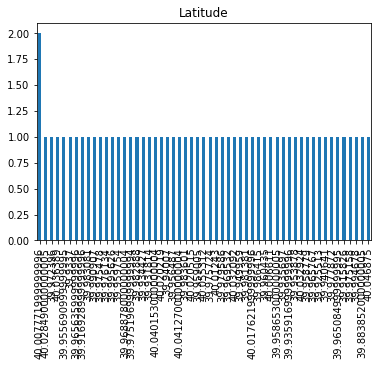

In [11]:
## Fazendo o mesmo com a Latitude
mydata2['Lat'].value_counts().plot(kind='bar', title='Latitude') 

In [12]:
mydata2['Lat'].fillna('40.007771999999996', inplace=True)
mydata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Dc_Dist             100 non-null    int64 
 1   Psa                 100 non-null    object
 2   Dispatch_Date_Time  100 non-null    object
 3   Dispatch_Date       100 non-null    object
 4   Dispatch_Time       100 non-null    object
 5   Hour                100 non-null    int64 
 6   Dc_Key              100 non-null    int64 
 7   Location_Block      100 non-null    object
 8   UCR_General         100 non-null    int64 
 9   Text_General_Code   100 non-null    object
 10  Month               100 non-null    object
 11  Lon                 100 non-null    object
 12  Lat                 100 non-null    object
dtypes: int64(4), object(9)
memory usage: 10.3+ KB


In [13]:
##Salvando os dados sem nulos no arquivo 'crimeExample_no_nulls.csv'
mydata2.to_csv('crime_noNulls.csv', index=False)

2. Remoção de Outliers:
Pontos fora da curva

In [14]:
##carregando o arquivo
mydata = pd.read_csv('crime_noNulls.csv')

In [15]:
mydata.describe()

,Dc_Dist,Hour,Dc_Key,UCR_General,Lon,Lat
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,23.990000,12.130000,2.012160e+11,852.000000,-75.136349,39.990965
std,20.060764,6.248483,2.987761e+08,561.469932,0.050181,0.031607
min,1.000000,0.000000,2.006770e+11,200.000000,-75.266605,39.883852
25%,15.000000,9.000000,2.009230e+11,600.000000,-75.171091,39.971680
50%,19.000000,12.000000,2.009990e+11,700.000000,-75.102881,40.007772
75%,24.000000,17.000000,2.015180e+11,800.000000,-75.102881,40.007772
max,92.000000,23.000000,2.015770e+11,2600.000000,-75.032986,40.055312


In [16]:
##Não identificamos nenhum outlier, então vamos apenas prosseguir
mydata.to_csv('crime_noNulls_noOutliers.csv', index=False)

3. Feature Engineering (modelando os dados)

In [17]:
##carregando os dados
mydata = pd.read_csv('crime_noNulls_noOutliers.csv')
mydata.head(5)

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800,Other Assaults,2009-10,-75.102881,40.007772
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600,All Other Offenses,2009-05,-75.102881,40.007772
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800,Other Assaults,2009-08,-75.102881,40.007772
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500,Weapon Violations,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600,All Other Offenses,2009-06,-75.166350,39.969532


 3.1 OHE (One-hot-encoding), convertendo dados categóricos em não-categóricos

In [18]:
novas_colunas = pd.get_dummies(mydata['Text_General_Code']) 
mydata2 = pd.concat([mydata,novas_colunas], axis=1) 
# axis = 1 concatena colunas. axis = 0 concatena linhas
mydata2.head(3)

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Month,Lon,Lat,Aggravated Assault Firearm,All Other Offenses,Arson,Burglary Non-Residential,Disorderly Conduct,Embezzlement,Fraud,Motor Vehicle Theft,Other Assaults,Rape,Recovered Stolen Motor Vehicle,Robbery Firearm,Robbery No Firearm,Theft from Vehicle,Thefts,Vagrancy/Loitering,Vandalism/Criminal Mischief,Weapon Violations
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800,Other Assaults,2009-10,-75.102881,40.007772,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600,All Other Offenses,2009-05,-75.102881,40.007772,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800,Other Assaults,2009-08,-75.102881,40.007772,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [19]:
##remover a coluna Text_General_Code, que já foi adcionada como outras colunas
mydata2.drop('Text_General_Code', axis=1 , inplace=True)

In [20]:
##salvando o arquivo
mydata2.to_csv('crime_noNulls_noOutliers_ohe.csv', index=False)

Construindo os gráficos para visualização de dados:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f440dad04e0>,
      dtype=object)

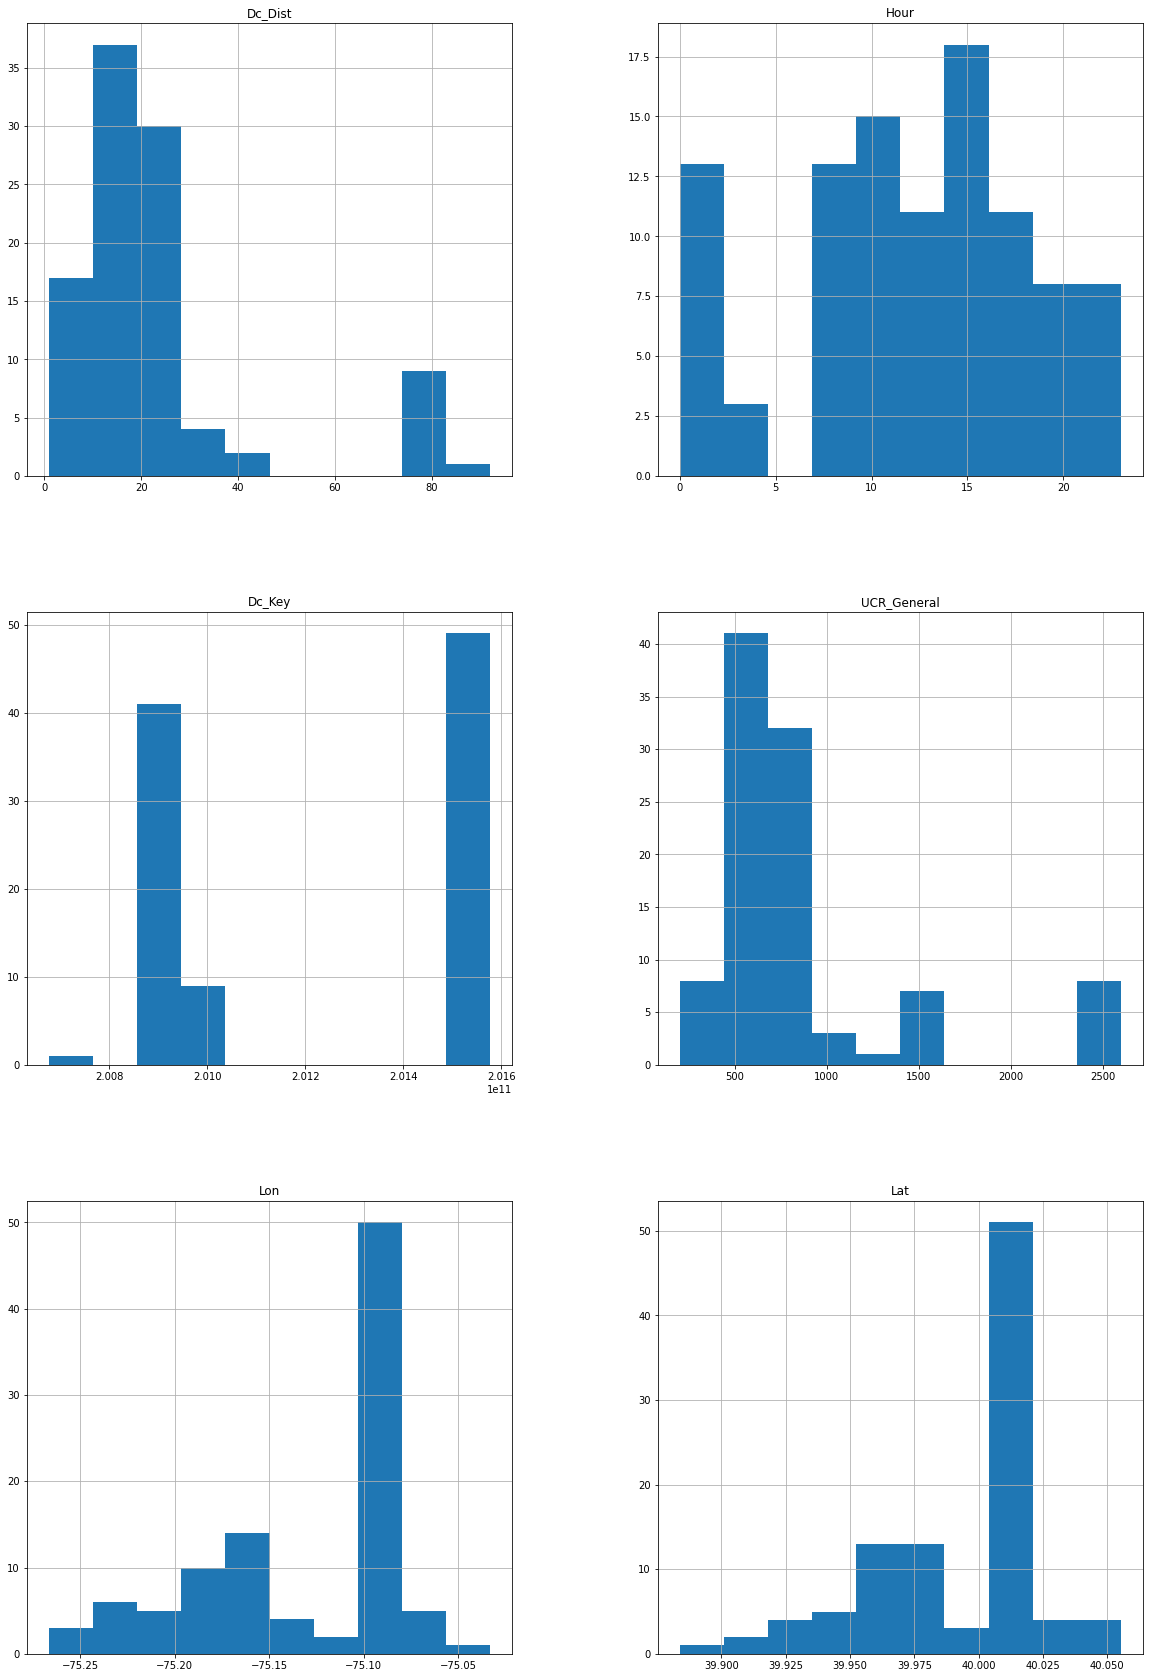

In [21]:
mydata.hist(figsize=(20,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f440d7db160>,
      dtype=object)

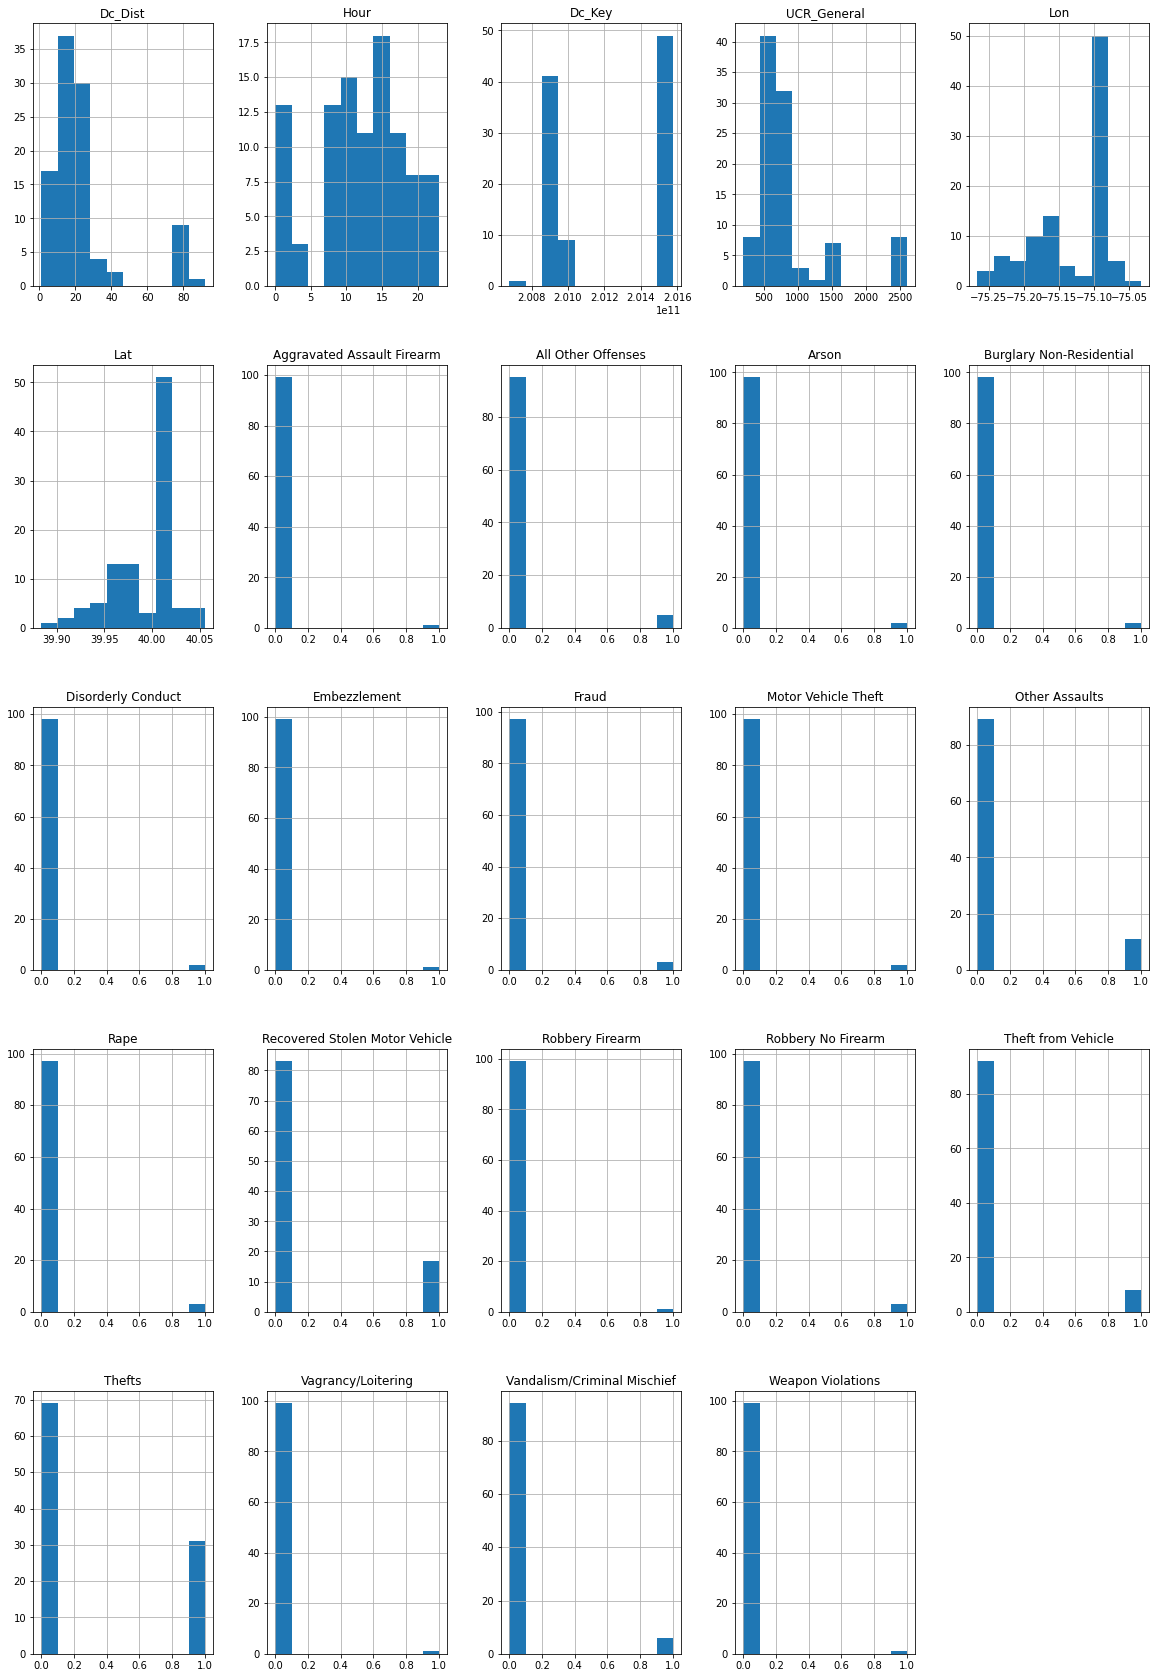

In [22]:
mydata2.hist(figsize=(20,30))

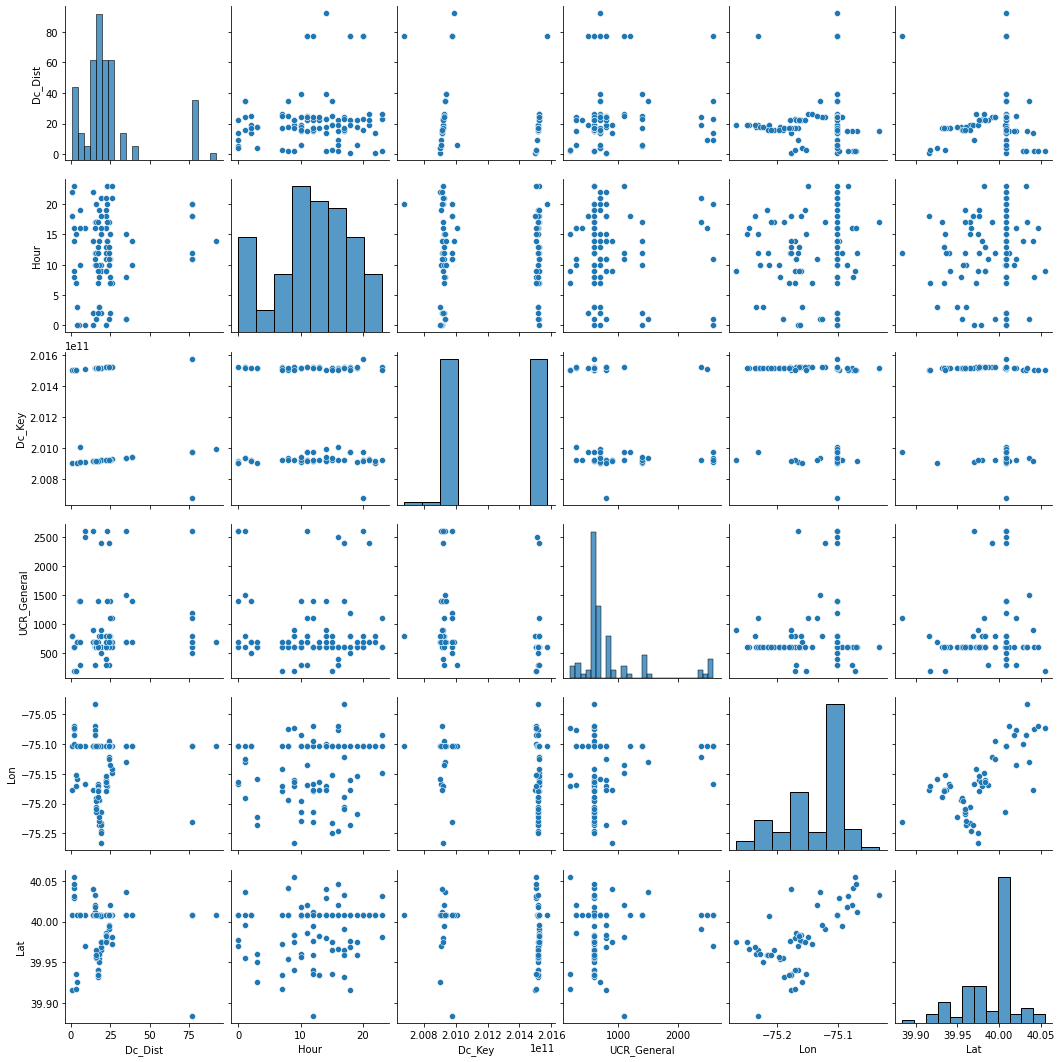

In [23]:
sns.pairplot(mydata)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f44074f7cc0>,
      dtype=object)

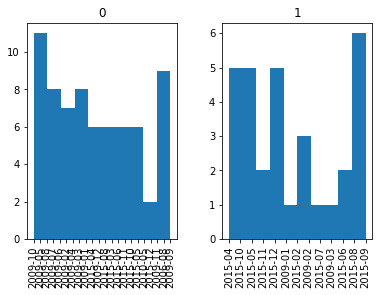

In [24]:
#Gerando histogramas com dimensões contínuas e categoricas 
mydata2.hist(by='Thefts',column = 'Month') 

In [25]:
# x1 = mydata2.loc[mydata.cut=='Thefts', 'Month']
# x2 = mydata2.loc[mydata.cut=='Theft from Vehicle', 'Month']

# kwargs = dict(alpha=0.5, bins=100)

# plt.hist(x1, **kwargs, color='g', label='Thefts')
# plt.hist(x2, **kwargs, color='b', label='Theft from Vehicle')
# plt.hist(x3, **kwargs, color='r', label='Vandalism/Criminal Mischief')
# plt.gca().set(title='Frequency Histogram of Criminal Occurrences', ylabel='Frequency')
# plt.xlim(50,75)
# plt.legend();

In [26]:
# Calculando Correlação
# Quanto mais próximo de 1: Diretamente relacionado
# Quanto mais próximo de -1: Inversamente relacionado
corr = mydata2.corr()
corr

,Dc_Dist,Hour,Dc_Key,UCR_General,Lon,Lat,Aggravated Assault Firearm,All Other Offenses,Arson,Burglary Non-Residential,Disorderly Conduct,Embezzlement,Fraud,Motor Vehicle Theft,Other Assaults,Rape,Recovered Stolen Motor Vehicle,Robbery Firearm,Robbery No Firearm,Theft from Vehicle,Thefts,Vagrancy/Loitering,Vandalism/Criminal Mischief,Weapon Violations
Dc_Dist,1.000000,0.144334,-0.283780,0.108110,0.117415,0.077476,-0.010020,0.087467,-0.053607,0.171842,-0.017821,0.266916,0.164554,-0.107285,-0.009431,-0.187873,0.188284,-0.010020,-0.079208,-0.055253,-0.132904,-0.075478,-0.061051,0.055438
Hour,0.144334,1.000000,0.004291,-0.110490,0.099023,0.096071,0.062561,-0.211439,-0.014476,-0.048943,0.157858,0.094892,0.090612,0.008502,0.100602,-0.050822,-0.056565,-0.018267,0.052896,-0.047668,0.097274,0.062561,-0.120420,-0.179922
Dc_Key,-0.283780,0.004291,1.000000,-0.314803,-0.455597,-0.394546,-0.099407,-0.219488,-0.143925,0.015371,0.002659,-0.080813,-0.043390,-0.147525,0.008846,0.169588,-0.431886,0.103474,-0.040004,0.153007,0.554616,0.099048,-0.252261,-0.094992
UCR_General,0.108110,-0.110490,-0.314803,1.000000,0.162388,0.156612,-0.081316,0.717828,0.012274,-0.090012,0.395848,0.062606,0.078070,-0.038869,-0.032724,-0.205248,-0.123136,-0.099306,-0.173768,-0.133017,-0.302352,0.296480,0.247827,0.116577
Lon,0.117415,0.099023,-0.455597,0.162388,1.000000,0.748560,0.067369,0.095455,-0.244356,0.095759,0.068326,0.067369,-0.124064,0.015182,0.007270,0.015407,0.303363,-0.066885,0.148122,-0.239136,-0.269463,0.067369,0.169352,0.011820
Lat,0.077476,0.096071,-0.394546,0.156612,0.748560,1.000000,0.053713,0.066817,0.075907,0.076348,0.038043,0.053713,-0.162441,-0.110484,-0.010632,-0.121079,0.241870,-0.014540,0.117189,-0.187188,-0.205849,0.053713,0.135023,0.145167
Aggravated Assault Firearm,-0.010020,0.062561,-0.099407,-0.081316,0.067369,0.053713,1.000000,-0.023057,-0.014358,-0.014358,-0.014358,-0.010101,-0.017675,-0.014358,-0.035333,-0.017675,-0.045485,-0.010101,-0.017675,-0.029637,-0.067366,-0.010101,-0.025392,-0.010101
All Other Offenses,0.087467,-0.211439,-0.219488,0.717828,0.095455,0.066817,-0.023057,1.000000,-0.032774,-0.032774,-0.032774,-0.023057,-0.040346,-0.032774,-0.080654,-0.040346,-0.103827,-0.023057,-0.040346,-0.067651,-0.153773,-0.023057,-0.057961,-0.023057
Arson,-0.053607,-0.014476,-0.143925,0.012274,-0.244356,0.075907,-0.014358,-0.032774,1.000000,-0.020408,-0.020408,-0.014358,-0.025123,-0.020408,-0.050223,-0.025123,-0.064653,-0.014358,-0.025123,-0.042126,-0.095754,-0.014358,-0.036092,-0.014358
Burglary Non-Residential,0.171842,-0.048943,0.015371,-0.090012,0.095759,0.076348,-0.014358,-0.032774,-0.020408,1.000000,-0.020408,-0.014358,-0.025123,-0.020408,-0.050223,-0.025123,-0.064653,-0.014358,-0.025123,-0.042126,-0.095754,-0.014358,-0.036092,-0.014358


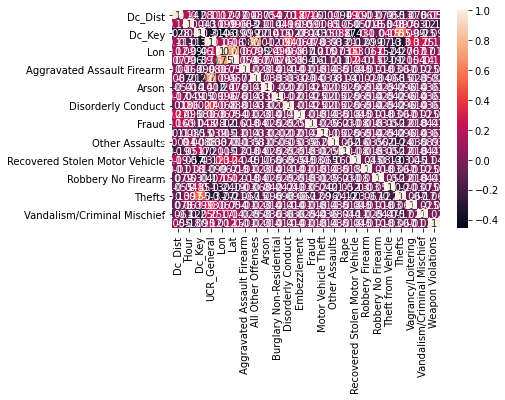

In [27]:
# Gerando uma matriz de correlação
# Perceba que quanto mais claro: Diretamente proporcional
# Perceba que quanto mais escuro: Inversamente proporcional
sns.heatmap(corr, annot=True)